# Momentum Trading Python code
Momentum trading is trading that depends on the movement of the stock. So if the stock looks to be rising quickly, it will buy in, looking to continue on that trajectory. If it then slows down it will sell in the hopes of avoiding a crash.

first, we download the necessary libraries.

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

next is to download the data necessary for the algorithm to run and define signals.


In [15]:
# Specify the stock symbol
symbol = 'AAPL'


# Fetch historical stock data from Yahoo Finance
data = yf.download(symbol, start='1980-12-12', end='2022-12-31')

# Define buy and sell signals
data['sell_signal'] = 0
data['buy_signal'] = 0

[*********************100%%**********************]  1 of 1 completed


Then we check how the stock moves  over a 50 and 200-day period and compare them to get our buy or sell signal.

In [16]:
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

for i in range(1, len(data)):
    if data['50_MA'][i] > data['200_MA'][i] and data['50_MA'][i - 1] <= data['200_MA'][i - 1]:
        data['buy_signal'][i] = 1
    elif data['50_MA'][i] < data['200_MA'][i] and data['50_MA'][i - 1] >= data['200_MA'][i - 1]:
        data['sell_signal'][i] = 1

C:\Users\jayso\AppData\Local\Temp\ipykernel_19836\3895536803.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['50_MA'][i] > data['200_MA'][i] and data['50_MA'][i - 1] <= data['200_MA'][i - 1]:
C:\Users\jayso\AppData\Local\Temp\ipykernel_19836\3895536803.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['50_MA'][i] < data['200_MA'][i] and data['50_MA'][i - 1] >= data['200_MA'][i - 1]:
C:\Users\jayso\AppData\Local\Temp\ipykernel_19836\3895536803.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works

next extact the values from the corrisponding signals

In [17]:
buy_signal_prices = data[data['buy_signal'] == 1]['Close']
sell_signal_prices = data[data['sell_signal'] == 1]['Close']

From there we extract the values from the corresponding signals

In [18]:
#Checks if the number of buy and lose signals are equal
if len(buy_signal_prices) == len(sell_signal_prices):
    # Calculate the difference between lose and buy prices
    profit_per_trade = sell_signal_prices.reset_index(drop=True) - buy_signal_prices.reset_index(drop=True)
    total_profit = profit_per_trade.sum()

    # Print the profit per trade
    print(f"Profit Per Trade: \n {profit_per_trade}")
else:
    print("Unequal number of buy and lose signals.")

print(f"Total Profit: {total_profit}")  

Profit Per Trade: 
 0      0.038505
1     -0.037946
2     -0.035715
3      0.219866
4     -0.022321
5     -0.116072
6     -0.088170
7     -0.018973
8     -0.120536
9     -0.033482
10    -0.090402
11     0.018973
12    -0.064174
13    -0.062500
14    -0.068080
15     0.116629
16     0.525669
17    -0.107678
18    -0.110000
19     1.731965
20     1.613572
21    -2.170714
22    14.777143
23    10.540714
24    12.275000
25    94.665005
26   -11.639999
Name: Close, dtype: float64
Total Profit: 121.7362787798047


Finally, we graph our trades

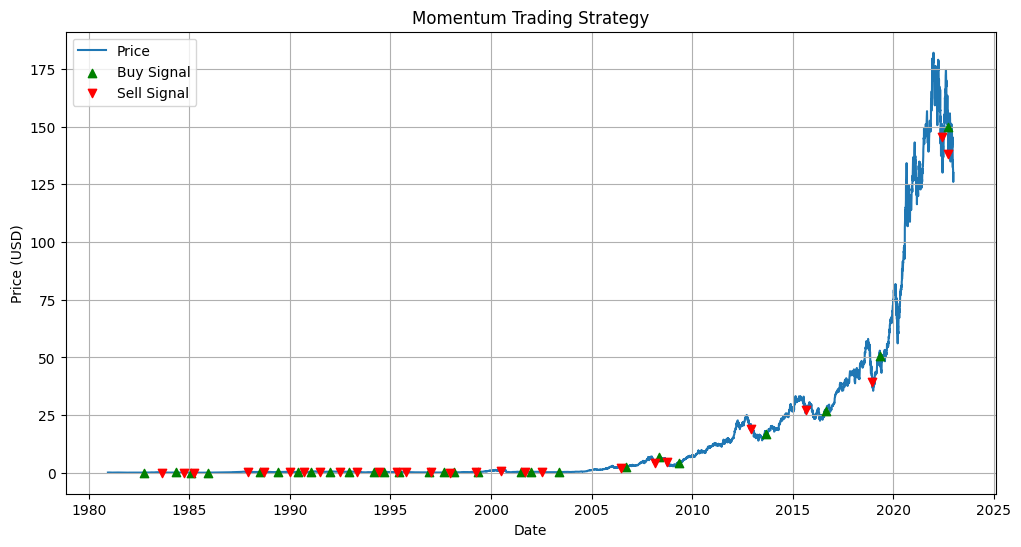

In [36]:
# Plot the price data
plt.figure(figsize=(12, 6))

plt.plot(data.index, data['Close'], label='Price' ,zorder=1)

# Plot buy signals on top
plt.scatter(data[data['buy_signal'] == 1].index, data[data['buy_signal'] == 1]['Close'], marker='^', color='g', label='Buy Signal' ,zorder=2)
# Plot sell signals on top
plt.scatter(data[data['sell_signal'] == 1].index, data[data['sell_signal'] == 1]['Close'], marker='v', color='r', label='Sell Signal' ,zorder=2)

plt.title('Momentum Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()